# Setup Code

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# imports
import torch
import numpy as np
import sys
import os
from matplotlib import pyplot as plt

In [4]:
# select devices
if torch.cuda.is_available():
    print("Good to go!")
    DEVICE = torch.device("cuda")
else:
    print("Bad to go!")
    DEVICE = torch.device("cpu")

Good to go!


Load config from config files.

In [5]:
# load config
sys.path.append(os.getcwd())
# choose between ship, lego
import configs.ship, configs.lego
# change config file here
config = configs.lego

Load the dataset and show the first one.

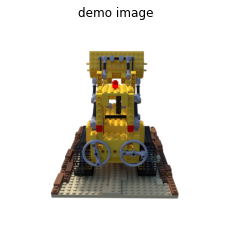

and its pose: 
[[-9.99902189e-01  4.19224519e-03 -1.33457193e-02 -5.37983216e-02]
 [-1.39886811e-02 -2.99659073e-01  9.53943670e-01  3.84547043e+00]
 [-4.65661287e-10  9.54037189e-01  2.99688309e-01  1.20808232e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [6]:
from nerf.data import load_blender
imgs, poses, int_mat = load_blender(config.datadir, device=DEVICE)
img_n, img_h, img_w = imgs.shape[:3]
# visualize
plt.imshow(np.array(imgs[0].to(device="cpu")))
plt.axis("off")
plt.title("demo image")
plt.show()
print("and its pose: ")
print(np.array(poses[0].to(device="cpu")))

In [8]:
def get_rays(H, W, K, c2w):
    i, j = torch.meshgrid(torch.linspace(0, W-1, W), torch.linspace(0, H-1, H))  # pytorch's meshgrid has indexing='ij'
    i = i.t().to(K.device)
    j = j.t().to(K.device)
    dirs = torch.stack([(i-K[0][2])/K[0][0], -(j-K[1][2])/K[1][1], -torch.ones_like(i)], -1)
    print(dirs.shape)
    print(dirs[..., None, :].shape)
    # Rotate ray directions from camera frame to the world frame
    rays_d = torch.sum(dirs[..., np.newaxis, :] * c2w[:3,:3], -1)  # dot product, equals to: [c2w.dot(dir) for dir in dirs]
    print(rays_d.shape)
    # Translate camera frame's origin to the world frame. It is the origin of all rays.
    rays_o = c2w[:3,-1].expand(rays_d.shape)
    return rays_o, rays_d

o, d = get_rays(img_h, img_w, int_mat, poses[0])
rays = torch.stack([get_rays(img_h, img_w, int_mat, p)])

torch.Size([800, 800, 3])
torch.Size([800, 800, 1, 3])
torch.Size([800, 800, 3])


NameError: name 'p' is not defined

In [16]:
from nerf.graphics import compute_rays

rays_o, rays_d = compute_rays(img_h, img_w, int_mat, poses[0])
print("origin: ", rays_o[0,0])
print("ray[0,0]: ", rays_d[0,0])

origin:  tensor([-0.0538,  3.8455,  1.2081], device='cuda:0', dtype=torch.float64)
ray[0,0]:  tensor([ 0.3549, -1.0634,  0.0485], device='cuda:0', dtype=torch.float64)


In [ ]:
# test posencode

from nerf_helper import PosEncode

L = 2
x = torch.tensor([[1.1, 1.2, 1.3], [2.1, 2.2, 2.3]])
enc_x = PosEncode(x, L)

print(enc_x)
